Title: Classification Model Performance Metrics

Sub-Title: ROC Curve

Task 1: Plot ROC curve for credit risk prediction and calculate AUC score.

AUC Score: 0.98


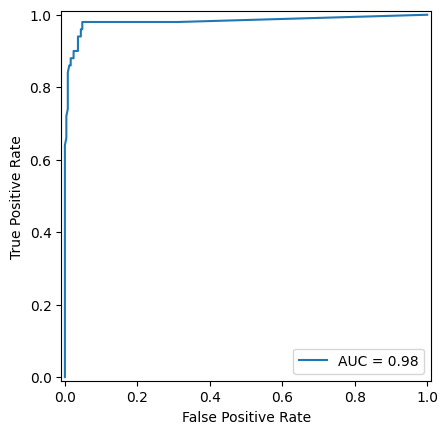

In [1]:
# Write your code here
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
from sklearn.datasets import make_classification

# Example: Generate a synthetic dataset for credit risk prediction
X, y = make_classification(n_samples=1000, n_features=5, n_informative=3, n_redundant=2, 
                           random_state=42, weights=[0.8, 0.2])  # 80% Non-risk, 20% Risk

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make probability predictions for the ROC curve (probability for the positive class)
y_prob = model.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate AUC score
roc_auc = auc(fpr, tpr)

# Plot ROC curve
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc).plot()

# Print AUC score
print(f"AUC Score: {roc_auc:.2f}")



Task 2: Examine ROC curve of email classification model for spam detection.

AUC Score: 1.00


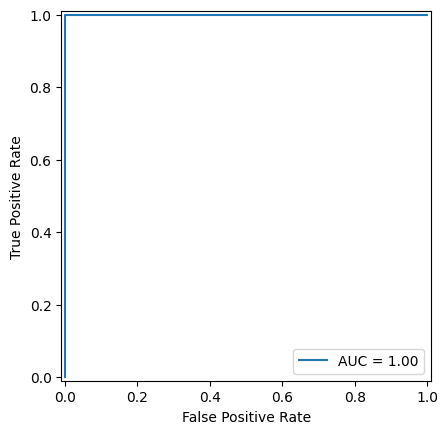

In [2]:
# Write your code here
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
from sklearn.datasets import fetch_20newsgroups

# Example: Load the dataset (replace with your email dataset)
# For demonstration, we'll use a subset of the 20 newsgroups dataset which is similar to spam classification
newsgroups = fetch_20newsgroups(subset='train', categories=['rec.autos', 'soc.religion.christian'])

# Convert the text data into a bag of words representation
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(newsgroups.data)

# Labels: Binary classification (1 = 'spam', 0 = 'not spam') - For simplicity, we'll use two categories
y = (newsgroups.target == 1).astype(int)  # 1 for 'soc.religion.christian' (considered spam), 0 for 'rec.autos'

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Naive Bayes classifier (a common choice for text classification tasks like spam detection)
model = MultinomialNB()
model.fit(X_train, y_train)

# Make probability predictions for the ROC curve (probability for the positive class)
y_prob = model.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate AUC score
roc_auc = auc(fpr, tpr)

# Plot ROC curve
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc).plot()

# Print AUC score
print(f"AUC Score: {roc_auc:.2f}")


Task 3: Use ROC-AUC to evaluate performance of a physical activity recognition model.

AUC Score: 0.00


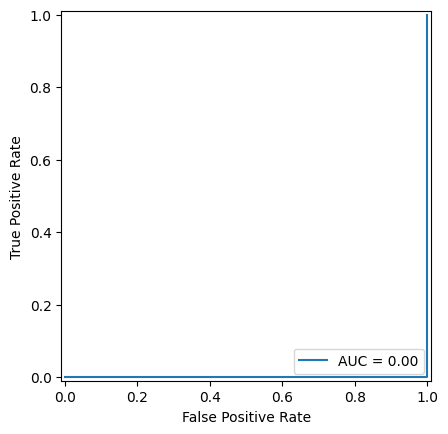

In [3]:
# Write your code here
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
from sklearn.preprocessing import LabelEncoder

data = {
    'acceleration_x': [0.1, 0.5, 0.3, 0.8, 1.2, 0.7, 1.0, 0.4],
    'acceleration_y': [0.2, 0.6, 0.4, 0.7, 1.1, 0.8, 1.1, 0.5],
    'acceleration_z': [0.3, 0.7, 0.5, 0.9, 1.3, 1.0, 1.2, 0.6],
    'activity': ['walking', 'running', 'sitting', 'running', 'walking', 'sitting', 'walking', 'running']
}

# Convert the data to a DataFrame
df = pd.DataFrame(data)

# Encode the 'activity' target as a numeric label (for multi-class classification)
label_encoder = LabelEncoder()
df['activity_encoded'] = label_encoder.fit_transform(df['activity'])

# Features and target
X = df[['acceleration_x', 'acceleration_y', 'acceleration_z']]
y = df['activity_encoded']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a model (Random Forest in this case)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make probability predictions for the ROC curve (for each class)
y_prob = model.predict_proba(X_test)

# Calculate the ROC curve for each class
fpr, tpr, thresholds = roc_curve(y_test, y_prob[:, 1], pos_label=1)  # For binary classification (e.g., activity 'running')

# Calculate AUC score
roc_auc = auc(fpr, tpr)

# Plot ROC curve
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc).plot()

# Print AUC score
print(f"AUC Score: {roc_auc:.2f}")
